In [1]:
# !pip install prophet

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_plotly, plot_components_plotly

In [3]:
# get data from yahoo finance
df = yf.download('GLD', start='2020-01-01')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,143.860001,144.210007,143.399994,143.949997,143.949997,7733800
2020-01-03,145.750000,146.320007,145.399994,145.860001,145.860001,12272800
2020-01-06,148.440002,148.479996,146.949997,147.389999,147.389999,14403300
2020-01-07,147.570007,148.139999,147.429993,147.970001,147.970001,7978500
2020-01-08,148.490005,148.610001,146.139999,146.860001,146.860001,22248500


In [4]:
# drop unnecessary columns
df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)
df.head()

,Close
Date,
2020-01-02,143.949997
2020-01-03,145.860001
2020-01-06,147.389999
2020-01-07,147.970001
2020-01-08,146.860001


In [5]:
# change column name
df.rename(columns={'Close': 'y'}, inplace=True)
df.head()

,y
Date,
2020-01-02,143.949997
2020-01-03,145.860001
2020-01-06,147.389999
2020-01-07,147.970001
2020-01-08,146.860001


In [6]:
# add ds column
df['ds'] = df.index
df.head()

,y,ds
Date,,
2020-01-02,143.949997,2020-01-02
2020-01-03,145.860001,2020-01-03
2020-01-06,147.389999,2020-01-06
2020-01-07,147.970001,2020-01-07
2020-01-08,146.860001,2020-01-08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 938 entries, 2020-01-02 to 2023-09-22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       938 non-null    float64       
 1   ds      938 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.0 KB


In [8]:
# instantiation Prophet model
m = Prophet()

In [9]:
# fit
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/w26bxu0j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/wswv5a25.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4096', 'data', 'file=/tmp/tmpbqa62urz/w26bxu0j.json', 'init=/tmp/tmpbqa62urz/wswv5a25.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_modelkacx_ofx/prophet_model-20230923070641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# make future dataframe
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
953,2023-10-08
954,2023-10-09
955,2023-10-10
956,2023-10-11
957,2023-10-12


In [11]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      958 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.6 KB


In [12]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
953,2023-10-08,186.232352,173.661829,182.458361,186.113721,186.365993,-8.166785,-8.166785,-8.166785,0.185210,0.185210,0.185210,-8.351995,-8.351995,-8.351995,0.0,0.0,0.0,178.065567
954,2023-10-09,186.291782,173.156372,182.375597,186.156318,186.450096,-8.477568,-8.477568,-8.477568,-0.156840,-0.156840,-0.156840,-8.320727,-8.320727,-8.320727,0.0,0.0,0.0,177.814214
955,2023-10-10,186.351212,173.499332,182.376247,186.174002,186.534122,-8.381646,-8.381646,-8.381646,-0.085926,-0.085926,-0.085926,-8.295720,-8.295720,-8.295720,0.0,0.0,0.0,177.969566
956,2023-10-11,186.410642,173.762270,182.831269,186.212192,186.630861,-8.303830,-8.303830,-8.303830,-0.026282,-0.026282,-0.026282,-8.277548,-8.277548,-8.277548,0.0,0.0,0.0,178.106812
957,2023-10-12,186.470072,173.602237,182.649876,186.244811,186.731022,-8.268793,-8.268793,-8.268793,-0.002516,-0.002516,-0.002516,-8.266277,-8.266277,-8.266277,0.0,0.0,0.0,178.201279


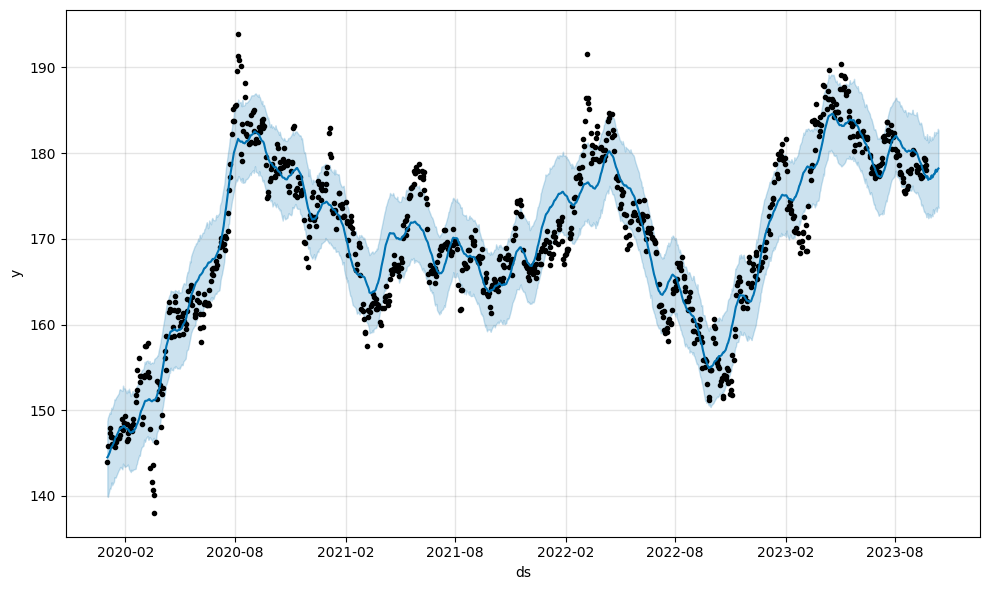

In [13]:
# plot
m.plot(forecast);

In [14]:
#  interactive plot
plot_plotly(m, forecast)

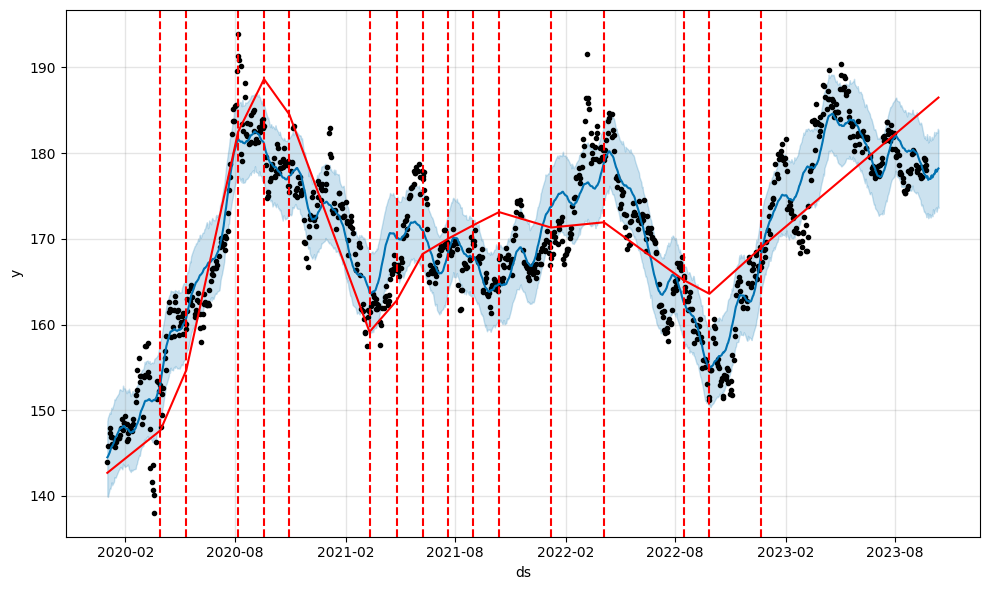

In [15]:
# plot
fig = m.plot(forecast)
add_changepoints_to_plot(fig.gca(), m, forecast);

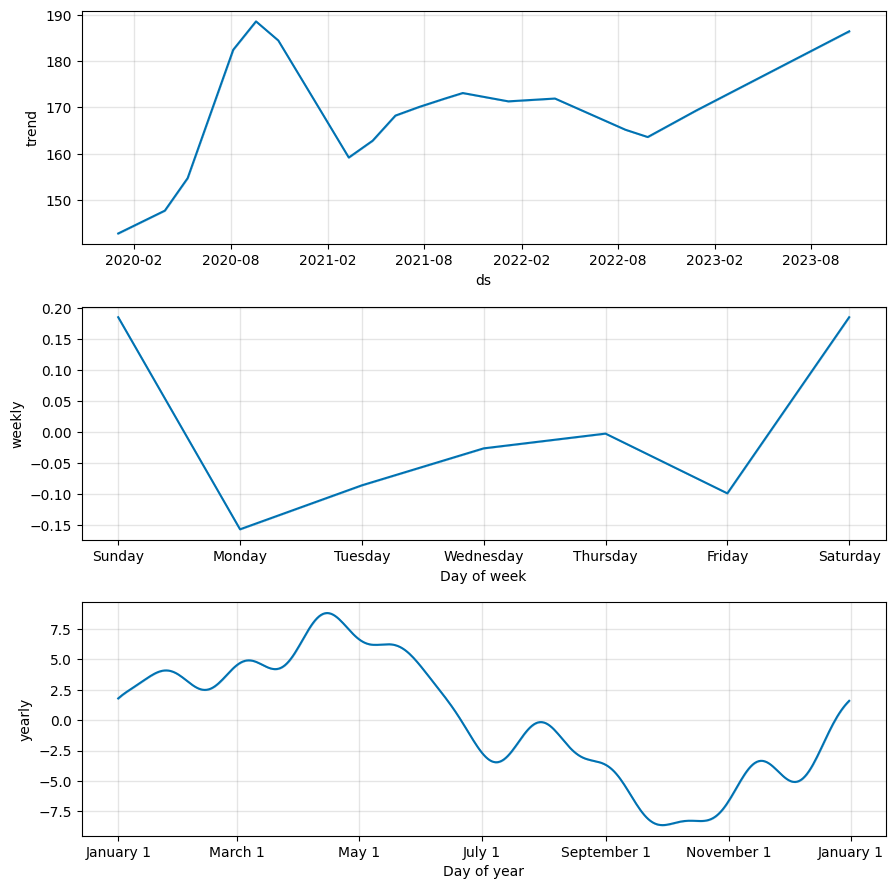

In [16]:
# plot components
m.plot_components(forecast);

In [17]:
# interactive plot
plot_components_plotly(m, forecast)

### Model with weekly seasonality = False

In [18]:
# instantiation Prophet model
m2 = Prophet(weekly_seasonality=False)

In [19]:
# fit
m2.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/h4_mns9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/nz380kw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14001', 'data', 'file=/tmp/tmpbqa62urz/h4_mns9t.json', 'init=/tmp/tmpbqa62urz/nz380kw6.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_modellq71mo83/prophet_model-20230923070644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
# make future dataframe
future2 = m2.make_future_dataframe(periods=20)

In [21]:
# forecast
forecast2 = m2.predict(future2)

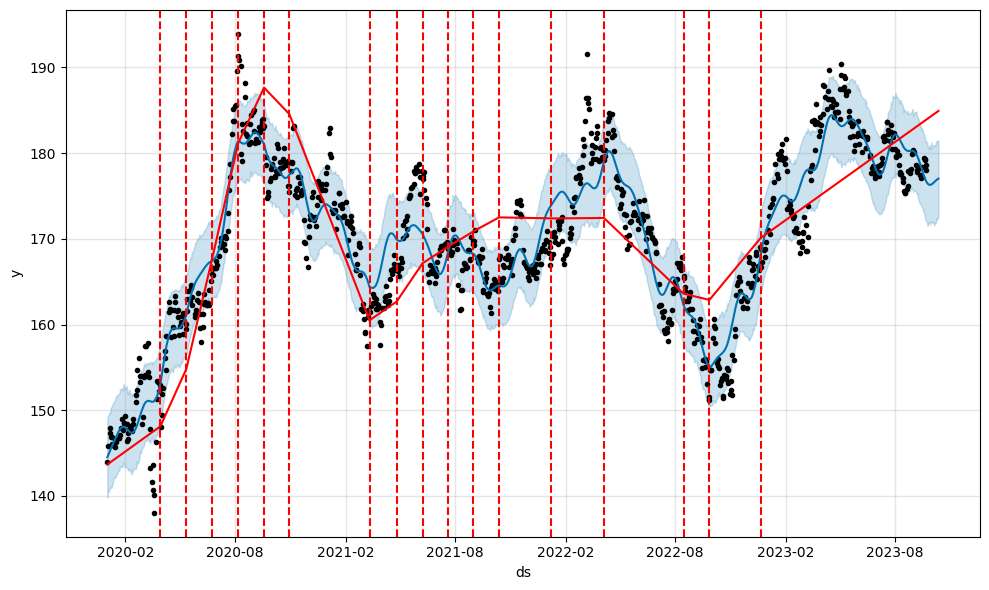

In [22]:
# plot
fig = m2.plot(forecast2)
add_changepoints_to_plot(fig.gca(), m2, forecast2);

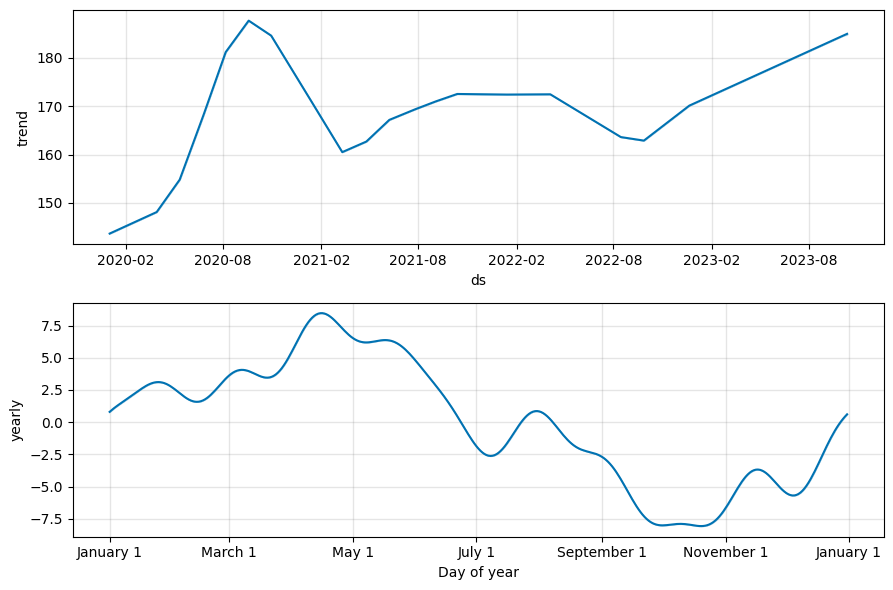

In [23]:
# plot components
m2.plot_components(forecast2);

## Cross Validation

In [24]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [25]:
# instantiation model
m3 = Prophet(weekly_seasonality=False)

In [26]:
# fit
m3.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/4q2d26pa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/_7fkzyuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75443', 'data', 'file=/tmp/tmpbqa62urz/4q2d26pa.json', 'init=/tmp/tmpbqa62urz/_7fkzyuk.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_models29iq4vx/prophet_model-20230923070646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
# cross validation
# Note:
# The initial model will be trained on the first 120 days of data.
# It will forecast the next 20 days of data (because horizon is set to 20).
# The model will then train on the initial period + the period (120 + 10 days in this case) and forecast the next 20 days.
# It will continued like this, adding another 10 days to the training data and then forecasting for the next 20
# until there is no longer enough data to do this.
df_cv = cross_validation(m3, initial='120 days', period='10 days', horizon='20 days')

INFO:prophet:Making 122 forecasts with cutoffs between 2020-05-10 00:00:00 and 2023-09-02 00:00:00


  0%|          | 0/122 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/rb1gn24e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/7ncsdyh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80444', 'data', 'file=/tmp/tmpbqa62urz/rb1gn24e.json', 'init=/tmp/tmpbqa62urz/7ncsdyh4.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_modele76m8t_y/prophet_model-20230923070647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:06:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/hi9k3ynv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/9zm7ny3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [28]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-11,165.127079,161.941109,168.261290,159.419998,2020-05-10
1,2020-05-12,167.029228,163.886995,170.153536,160.039993,2020-05-10
2,2020-05-13,169.183004,166.099674,172.517827,161.580002,2020-05-10
3,2020-05-14,171.526051,168.417711,175.060136,163.009995,2020-05-10
4,2020-05-15,173.967640,170.576420,177.183981,163.929993,2020-05-10
5,2020-05-18,180.495454,177.094061,183.712634,162.690002,2020-05-10
6,2020-05-19,181.770297,178.626728,185.077948,164.259995,2020-05-10
7,2020-05-20,182.188161,178.966822,185.256595,164.649994,2020-05-10
8,2020-05-21,181.453317,178.115216,184.405090,162.250000,2020-05-10
9,2020-05-22,179.238444,175.899549,182.518091,163.210007,2020-05-10


In [29]:
df_cv.tail(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1662,2023-09-05,180.070063,175.459200,184.718251,178.639999,2023-08-23
1663,2023-09-06,179.905092,175.391276,184.490771,177.830002,2023-08-23
1664,2023-09-07,179.716962,175.318677,183.862518,178.020004,2023-08-23
1665,2023-09-08,179.507348,174.759723,184.228952,178.080002,2023-08-23
1666,2023-09-11,178.775171,174.281946,183.476559,178.410004,2023-08-23
1667,2023-09-12,178.507650,174.034628,183.338252,177.490005,2023-08-23
1668,2023-09-05,179.747079,175.170190,184.486660,178.639999,2023-09-02
1669,2023-09-06,179.606665,174.799155,184.316876,177.830002,2023-09-02
1670,2023-09-07,179.443094,174.991652,183.571676,178.020004,2023-09-02
1671,2023-09-08,179.257651,174.621541,183.632838,178.080002,2023-09-02


In [30]:
# make future dataframe
future3 = m3.make_future_dataframe(periods=20)

In [31]:
# forecast
forecast3 = m3.predict(future3)

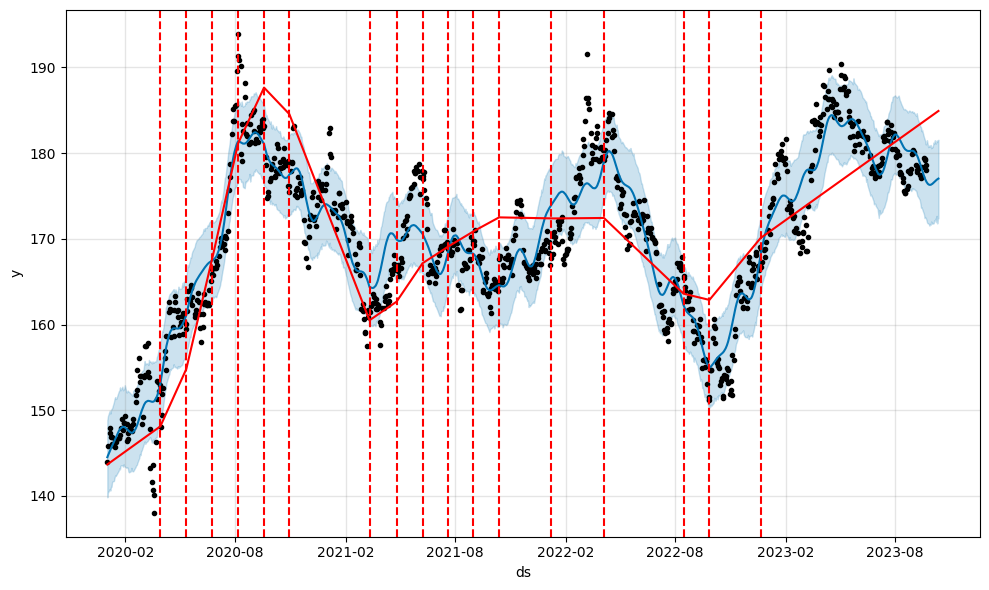

In [32]:
# plot
fig = m3.plot(forecast3)
add_changepoints_to_plot(fig.gca(), m3, forecast3);

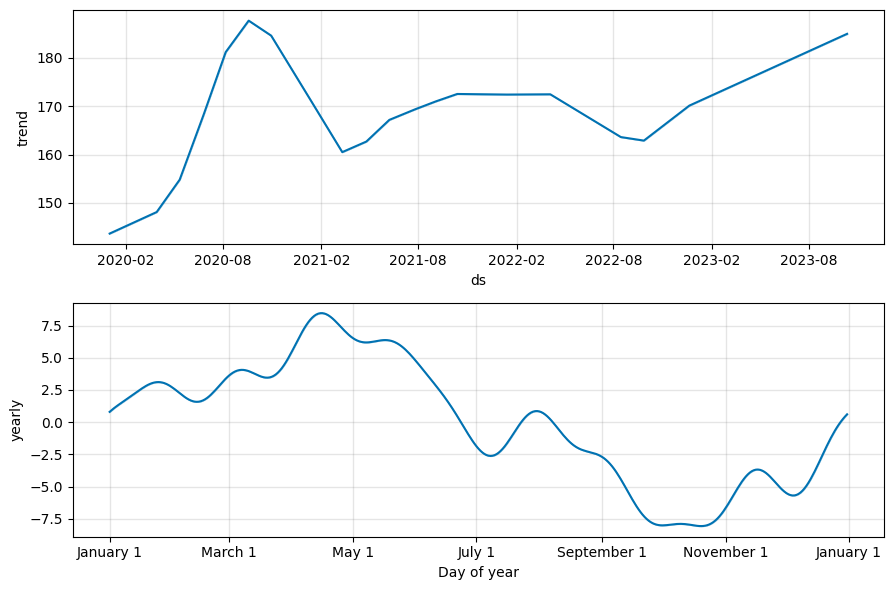

In [33]:
# plot components
m3.plot_components(forecast3);

In [34]:
# performance metrics
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,20.938297,4.575838,3.728962,0.021720,0.019671,0.021674,0.523810
1,3 days,29.401557,5.422320,4.360146,0.025473,0.022044,0.025335,0.482213
2,4 days,32.668227,5.715613,4.539929,0.026432,0.022579,0.026301,0.464286
3,5 days,33.363458,5.776111,4.585993,0.026623,0.022771,0.026557,0.478992
4,6 days,52.872671,7.271360,5.287614,0.030689,0.026183,0.030432,0.452381
5,7 days,82.107134,9.061299,6.131668,0.035475,0.029583,0.034974,0.407738
6,8 days,106.954826,10.341897,6.870375,0.039620,0.033238,0.039082,0.363095
7,9 days,144.491259,12.020452,7.839290,0.045306,0.037315,0.044771,0.296008
8,10 days,182.726031,13.517619,8.367846,0.048286,0.038259,0.047450,0.301929
9,11 days,146.506819,12.104000,7.904138,0.045568,0.036733,0.045044,0.326355


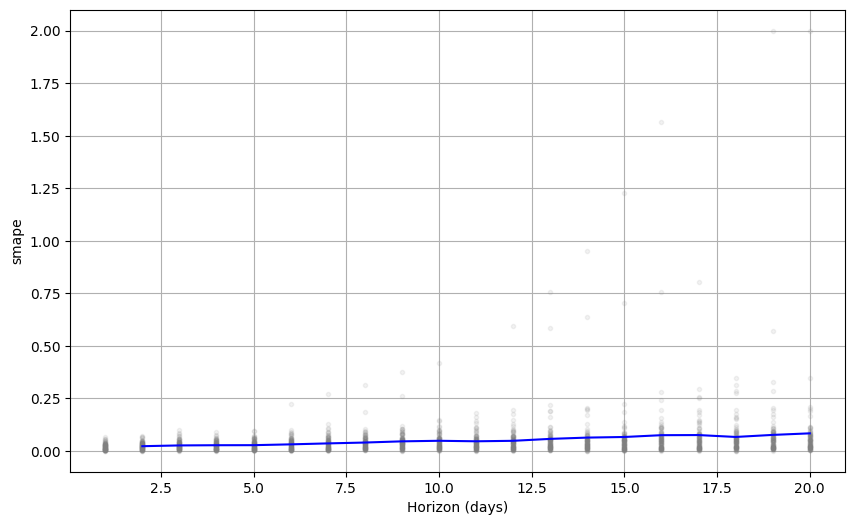

In [35]:
# plot cross validation metric
plot_cross_validation_metric(df_cv, metric='smape');

## Cross Validation with Logged Data

In [36]:
df.head()

,y,ds
Date,,
2020-01-02,143.949997,2020-01-02
2020-01-03,145.860001,2020-01-03
2020-01-06,147.389999,2020-01-06
2020-01-07,147.970001,2020-01-07
2020-01-08,146.860001,2020-01-08


In [37]:
# Log Close(y)
log_df = np.log(df[['y']])
log_df['ds'] = log_df.index
log_df.head()

,y,ds
Date,,
2020-01-02,4.969466,2020-01-02
2020-01-03,4.982647,2020-01-03
2020-01-06,4.993082,2020-01-06
2020-01-07,4.997010,2020-01-07
2020-01-08,4.989480,2020-01-08


In [38]:
# instantiation model
m4 = Prophet(weekly_seasonality=False)

In [39]:
# fit
m4.fit(log_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/zmbre0wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/po_zy49t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55489', 'data', 'file=/tmp/tmpbqa62urz/zmbre0wp.json', 'init=/tmp/tmpbqa62urz/po_zy49t.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_modelf2hiicmb/prophet_model-20230923070743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
# cross validation
df_cv_log = cross_validation(m4, horizon='20 days', period='10 days', initial='120 days')

INFO:prophet:Making 122 forecasts with cutoffs between 2020-05-10 00:00:00 and 2023-09-02 00:00:00


  0%|          | 0/122 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/esg48rzy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/fg17yfu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60282', 'data', 'file=/tmp/tmpbqa62urz/esg48rzy.json', 'init=/tmp/tmpbqa62urz/fg17yfu5.json', 'output', 'file=/tmp/tmpbqa62urz/prophet_model67r5g9q6/prophet_model-20230923070744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/jsygd23r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbqa62urz/bu324v_f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [41]:
# performance metrics
pm = performance_metrics(df_cv_log)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,0.000650,0.025496,0.018633,0.003620,0.002828,0.003622,0.619048
1,3 days,0.001146,0.033853,0.023859,0.004636,0.003658,0.004637,0.499230
2,4 days,0.001901,0.043602,0.030024,0.005831,0.004577,0.005835,0.410714
3,5 days,0.002171,0.046593,0.032396,0.006291,0.004511,0.006293,0.431162
4,6 days,0.002682,0.051789,0.034774,0.006757,0.004490,0.006744,0.446429
5,7 days,0.004718,0.068688,0.040852,0.007928,0.004677,0.007928,0.401644
6,8 days,0.008068,0.089824,0.048637,0.009429,0.005203,0.009447,0.351190
7,9 days,0.012658,0.112509,0.058531,0.011355,0.005855,0.011373,0.319818
8,10 days,0.017853,0.133616,0.067556,0.013103,0.006757,0.013104,0.307608
9,11 days,0.024152,0.155410,0.078148,0.015155,0.007224,0.015145,0.285509


In [42]:
pm['smape'].mean()

0.017474141508310864

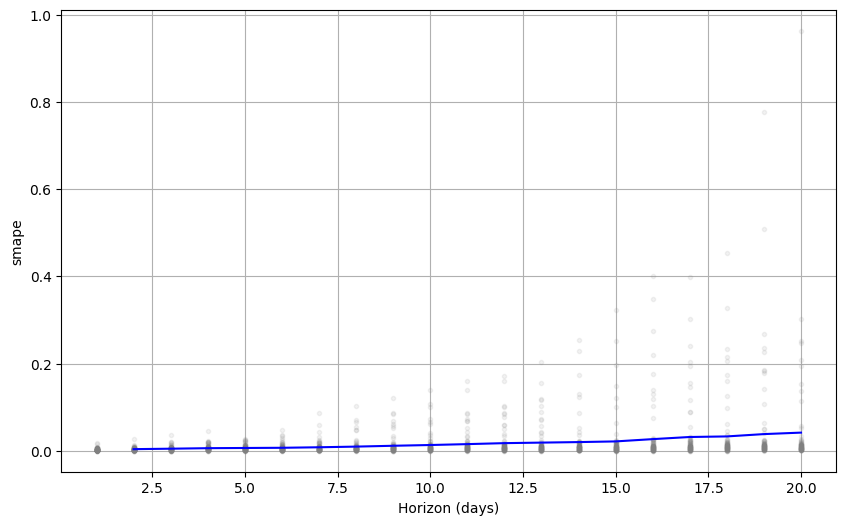

In [43]:
# plot
plot_cross_validation_metric(df_cv_log, metric='smape');